$$
\ddot{x}=-\omega_s^2x-2D\omega_s\dot{x}+\sin{[\Phi(t)]}.
$$

$$
\Phi(t) = \omega_0 t + \frac{\varepsilon}{2}\cdot t^2
$$

$D=0.02$, $\omega_0 =0$, $\varepsilon = 0.002\omega_s^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def linramp(t, eps, om0):
    return om0*t+eps*t**2/2

def linosc(y, t, om0, eps, om):
    return [y[1], -2*0.02*om*y[1] -
          (om**2)*y[0] +
          np.sin(linramp(t, eps*om**2, om0))]

Resonance frequency: $$\omega_r = \sqrt{\omega_s^2 - \frac{4D^2\omega_s^2}{2}} = \omega_s \sqrt{1- 2D^2} \sim \omega_s$$

In [3]:
oms = 0.7
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)


In [4]:
print(omegaRes)

0.6997199439775887


## Changing the oscillator's frequency, $\omega_s$

In [7]:
t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'$\\omega_s = 0.7$')

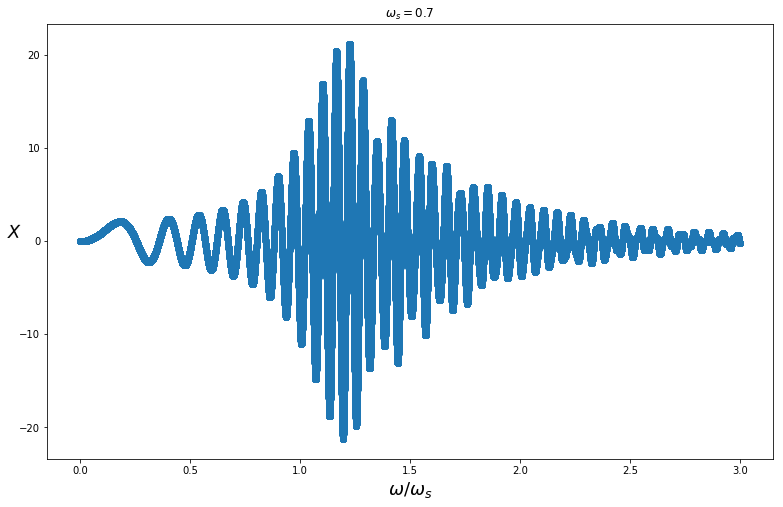

In [8]:
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = 0.7$')

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.5$')

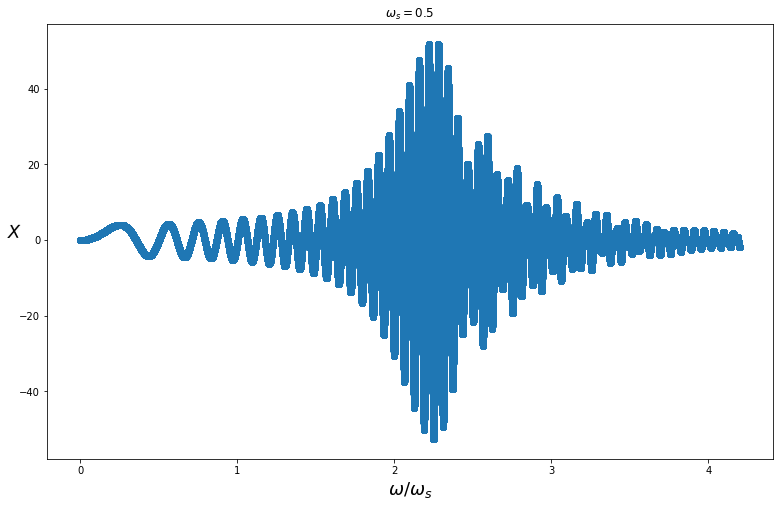

In [9]:
oms = 0.5
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 1.0$')

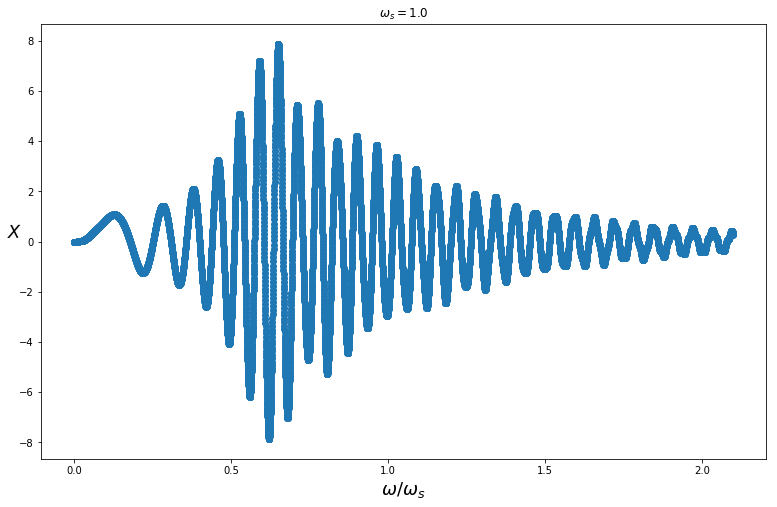

In [10]:
oms = 1.
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.8$')

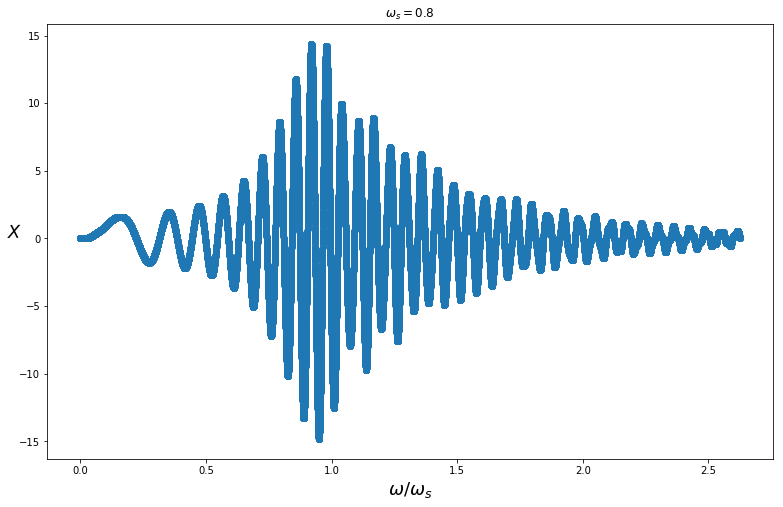

In [11]:
oms = 0.8
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

In [57]:
def getMaxFrequency(omss):
    eps = 2*1e-2*omss**2

    t = np.arange(0., 3*1.4/eps, eps)
    sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, omss))
    maxplace = np.argmax(sol[:,0])
    return linramp(t[maxplace], eps, 0.)/(t[maxplace]*omss)

In [58]:
resonances = []

In [59]:
omegas = np.arange(0.5, 1.1, 0.001)
for o in omegas:
    resonances.append(getMaxFrequency(o))

In [63]:
resonances = np.array(resonances)
isone = resonances[np.abs(resonances-1.)<0.01]


Text(0,0.5,'$Resonance Freq / \\omega_s$')

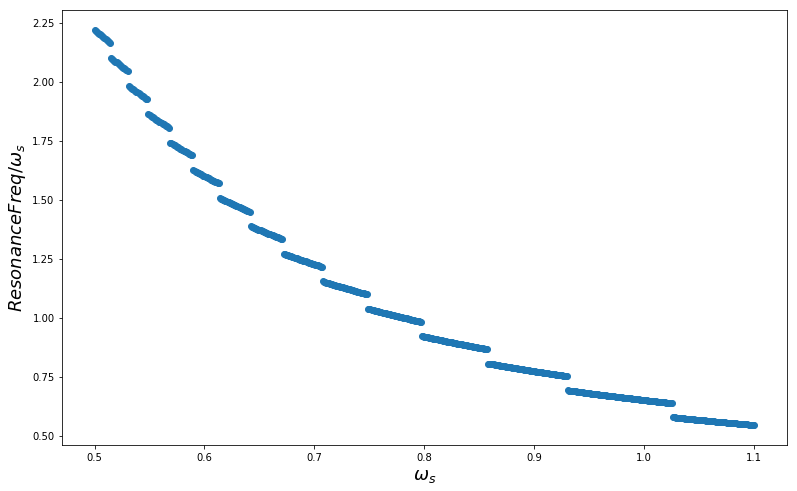

In [60]:
plt.figure(figsize=(13,8))
plt.plot(omegas, resonances, 'o')
plt.xlabel('$\omega_s$',fontsize=18)
plt.ylabel('$Resonance Freq / \omega_s$',fontsize=18)


## Minimal difference:

In [65]:
minimal = np.min(np.abs(resonances-1.))
print(minimal)

place = np.where(np.logical_or(resonances == 1-minimal, resonances == 1 + minimal))[0] 
print(omegas[place])

0.00026989525739884446
[0.781]


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.781$')

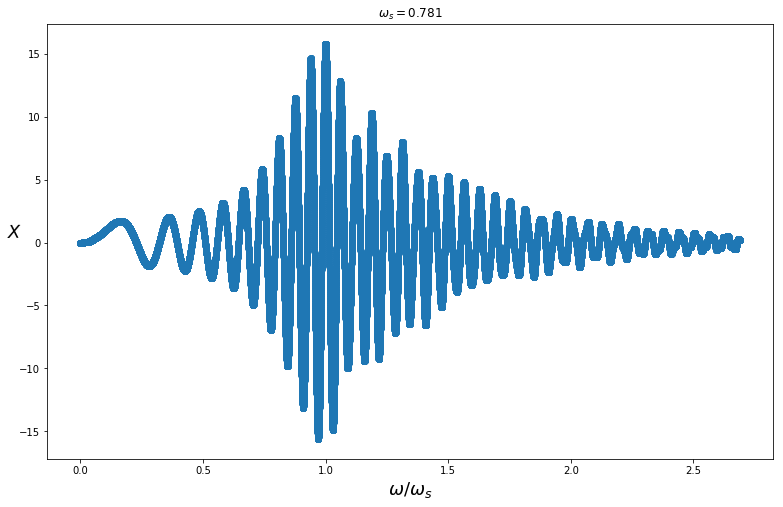

In [66]:
oms = 0.781
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)